# Principal Component Analysis
Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the **Principal Components**. It is one of the popular tools that is used for exploratory data analysis and predictive modeling. It is a technique to draw strong patterns from the given dataset by reducing the variances.

PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.

PCA works by considering the variance of each attribute because the high attribute shows the good split between the classes, and hence it reduces the dimensionality. Some real-world applications of PCA are **_image processing, movie recommendation system, optimizing the power allocation in various communication channels._** It is a feature extraction technique, so it contains the important variables and drops the least important variable.

## The PCA algorithm is based on some mathematical concepts such as:

- Variance and Covariance
- Eigenvalues and Eigen factors

## Some common terms used in PCA algorithm:

- **Dimensionality:** It is the number of features or variables present in the given dataset. More easily, it is the number of columns present in the dataset.
- **Correlation:** It signifies that how strongly two variables are related to each other. Such as if one changes, the other variable also gets changed. The correlation value ranges from -1 to +1. Here, -1 occurs if variables are inversely proportional to each other, and +1 indicates that variables are directly proportional to each other.
- **Orthogonal:** It defines that variables are not correlated to each other, and hence the correlation between the pair of variables is zero.
- **Eigenvectors:** If there is a square matrix M, and a non-zero vector v is given. Then v will be eigenvector if Av is the scalar multiple of v.
- **Covariance Matrix:** A matrix containing the covariance between the pair of variables is called the Covariance Matrix.

## Principal Components in PCA

The output of PCA are the Principal Components. The number of these PCs are either equal to or less than the original features present in the dataset. Some properties of these principal components are given below:

- The principal component must be the linear combination of the original features.
- These components are orthogonal, i.e., the correlation between a pair of variables is zero.
- The importance of each component decreases when going to 1 to n, it means the 1 PC has the most importance, and n PC will have the least importance.

## Steps for PCA algorithm

1. **Getting the dataset**  
  Firstly, we need to take the input dataset and divide it into two subparts X and Y, where X is the training set, and Y is the validation set.

2. **Representing data into a structure**  
  Now we will represent our dataset into a structure. Such as we will represent the two-dimensional matrix of independent variable X. Here each row corresponds to the data items, and the column corresponds to the Features. The number of columns is the dimensions of the dataset.

3. **Standardizing the data**  
  In this step, we will standardize our dataset. Such as in a particular column, the features with high variance are more important compared to the features with lower variance.  
  If the importance of features is independent of the variance of the feature, then we will divide each data item in a column with the standard deviation of the column. Here we will name the matrix as Z.

4. **Calculating the Covariance of Z**  
  To calculate the covariance of Z, we will take the matrix Z, and will transpose it. After transpose, we will multiply it by Z. The output matrix will be the Covariance matrix of Z.

5. **Calculating the Eigen Values and Eigen Vectors**  
  Now we need to calculate the eigenvalues and eigenvectors for the resultant covariance matrix Z. Eigenvectors or the covariance matrix are the directions of the axes with high information. And the coefficients of these eigenvectors are defined as the eigenvalues.

6. **Sorting the Eigen Vectors**  
  In this step, we will take all the eigenvalues and will sort them in decreasing order, which means from largest to smallest. And simultaneously sort the eigenvectors accordingly in matrix P of eigenvalues. The resultant matrix will be named as P\*.
  
7. **Calculating the new features Or Principal Components**  
  Here we will calculate the new features. To do this, we will multiply the P\* matrix to the Z. In the resultant matrix Z\*, each observation is the linear combination of original features. Each column of the Z\* matrix is independent of each other.
  
8. **Remove less or unimportant features from the new dataset.**  
  The new feature set has occurred, so we will decide here what to keep and what to remove. It means, we will only keep the relevant or important features in the new dataset, and unimportant features will be removed out.

Applications of Principal Component Analysis

- PCA is mainly used as the dimensionality reduction technique in various AI applications such **as computer vision, image compression, etc.**
- It can also be used for finding hidden patterns if data has high dimensions. Some fields where PCA is used are Finance, data mining, Psychology, etc.

# Program
### basic imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint,random,randrange


### Generate Data points with some correlation

In [4]:
x=np.arange(5,50,5)
y=np.array([],dtype=float)
for v in x:
    noise=2*random()
    scale=10
    
    # try
    # noise=0
    # scale=1,-1,-10
    y=np.append(y,(v+noise*10)/scale)
df=pd.DataFrame(dict(x=x,y=y))
df


,x,y
0,5,1.203014
1,10,2.696439
2,15,2.572250
3,20,3.696062
4,25,2.963923
5,30,3.576415
6,35,5.455621
7,40,4.572276
8,45,4.826511


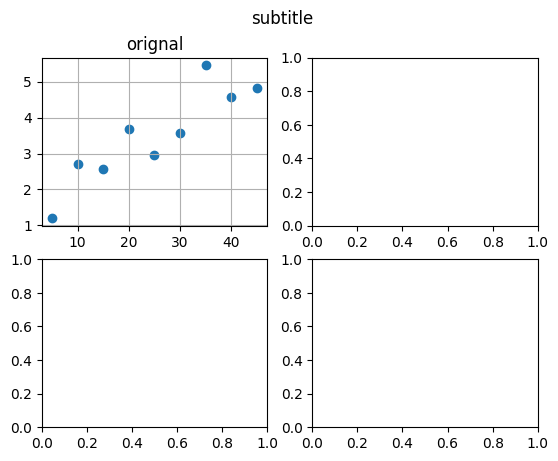

In [5]:
fig, ax = plt.subplots(2, 2)
fig.suptitle("subtitle")
ax1=ax[0,0]
ax1.grid(True)
ax1.set_title("orignal")
ax1.scatter(x,y)

### Center Data Points

In [6]:
x_mean=df.x.values.mean()
y_mean=df.y.values.mean()
xc=x-x_mean
yc=y-y_mean

df["Xcentered"]=xc
df["Ycentered"]=yc
df


,x,y,Xcentered,Ycentered
0,5,1.203014,-20.0,-2.303932
1,10,2.696439,-15.0,-0.810506
2,15,2.572250,-10.0,-0.934696
3,20,3.696062,-5.0,0.189117
4,25,2.963923,0.0,-0.543023
5,30,3.576415,5.0,0.069470
6,35,5.455621,10.0,1.948675
7,40,4.572276,15.0,1.065330
8,45,4.826511,20.0,1.319565


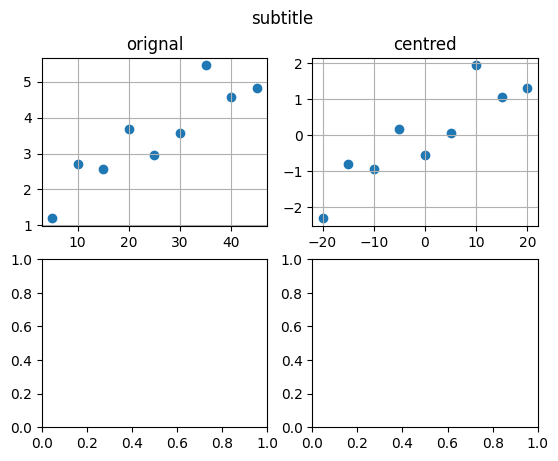

In [7]:
ax2=ax[0,1]
ax2.grid(True)
ax2.set_title("centred")
ax2.scatter(xc,yc)
fig

$VAR(X)= \sum \frac{(xi – x)^2}{n}$

$COV(X, Y) = \sum\frac{(x_i–x)(y_i–y)}{ n}$

In [8]:
def variance(*args):
    a=args[0]
    if len(args)==1:
        b=a
    else:
        b=args[1]
    a=np.array(a)
    b=np.array(b)
    v=np.array([])
    if a.shape!=b.shape:
        print("size error")
        return 0
    for i in range(0,len(a)):
        
        v=np.append(v,a[i]*b[i])
    
    # print(v)
#     if len(args)==1:
#         var=np.sum(v)/(len(a)-1)
#     else:
#         var=np.sum(v)/(len(a))
        
    var=np.sum(v)/(len(a))
            
    return var

varX=variance(x)
varY=variance(y)
varXY=variance(x,y)
covXY=varXY

print(f"vaiance of x = {varX}")
print(f"vaiance of y = {varY}\n")

print(f"covaiance of xy = {covXY}")

vaiance of x = 791.6666666666666
vaiance of y = 13.837298166241688

covaiance of xy = 101.98953179630085


### Standard Deviation

In [9]:
sdX=varX**(1/2)
sdY=varY**(1/2)

### normalized and centered

In [10]:
xcn=xc/sdX
ycn=yc/sdY

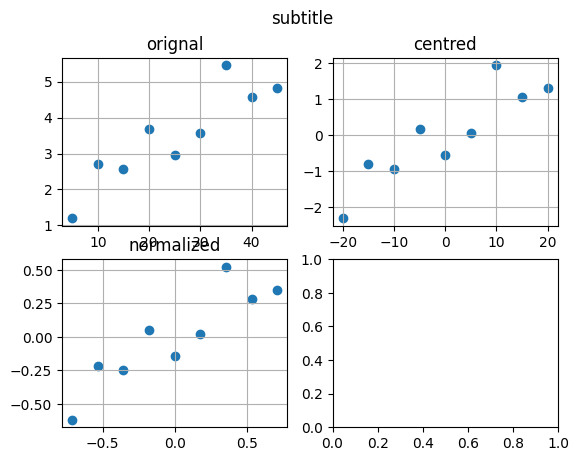

In [11]:
ax3=ax[1,0]
ax3.grid(True)
ax3.set_title("normalized")
ax3.scatter(xcn,ycn)
fig

### Correlation

$corr(X,Y)=\frac{cov(X,Y)}{\sqrt{var(X)*var(Y)}}$

In [13]:
def correlation(*args):
    if len(args)!=2:
        print('err')
        return
    a=args[0]
    b=args[1]
    varx=variance(a)
    vary=variance(b)
    cov=variance(a,b)
    corr=cov/((varx*vary)**(1/2))
    return corr

corXY=correlation(x,y)
print(f"correlation of xy = {corXY}")

correlation of xy = 0.9744482249614985


### The value of correletion lies in range -1 to 1, however covariance is unbounded